## Cell subsampling using TopACeDo

In [1]:
%load_ext autotime
%config InlineBackend.figure_format = 'retina'

import scarf
scarf.__version__

'0.6.3'

time: 756 ms


Need to install the TopACeDo algorithm to perform subsampling

In [2]:
!pip install git+https://github.com/fraenkel-lab/pcst_fast.git@deb3236cc26ee9fee77d5af40fac3f12bb753850
!pip install -U topacedo

  Cloning https://github.com/fraenkel-lab/pcst_fast.git (to revision deb3236cc26ee9fee77d5af40fac3f12bb753850) to /tmp/pip-req-build-a3rw9q3j
  Created wheel for pcst-fast: filename=pcst_fast-1.0.7-cp38-cp38-linux_x86_64.whl size=1076415 sha256=f0b748dc6288918bad500dbc9829fc511c9c2f67ee6219c96cb485aea8d4b8bf
  Stored in directory: /home/parashar/.cache/pip/wheels/48/f1/74/6bb2e9cc262228dbdc63916ec60f0717574b5f633b6ee30b0a
Successfully built pcst-fast
Requirement already up-to-date: topacedo in /home/parashar/miniconda3/lib/python3.8/site-packages (0.2.6)
time: 13.7 s


In [3]:
# Loading preanalyzed dataset that was processed in the `basic_tutorial` vignette
scarf.fetch_dataset('tenx_10k_pbmc_citeseq', as_zarr=True, save_path='scarf_data')

INFO: Download started...
INFO: Download finished! File saved here: scarf_data/tenx_10k_pbmc_citeseq/data.zarr.tar.gz
time: 3.17 s


INFO: Using existing dendrogram


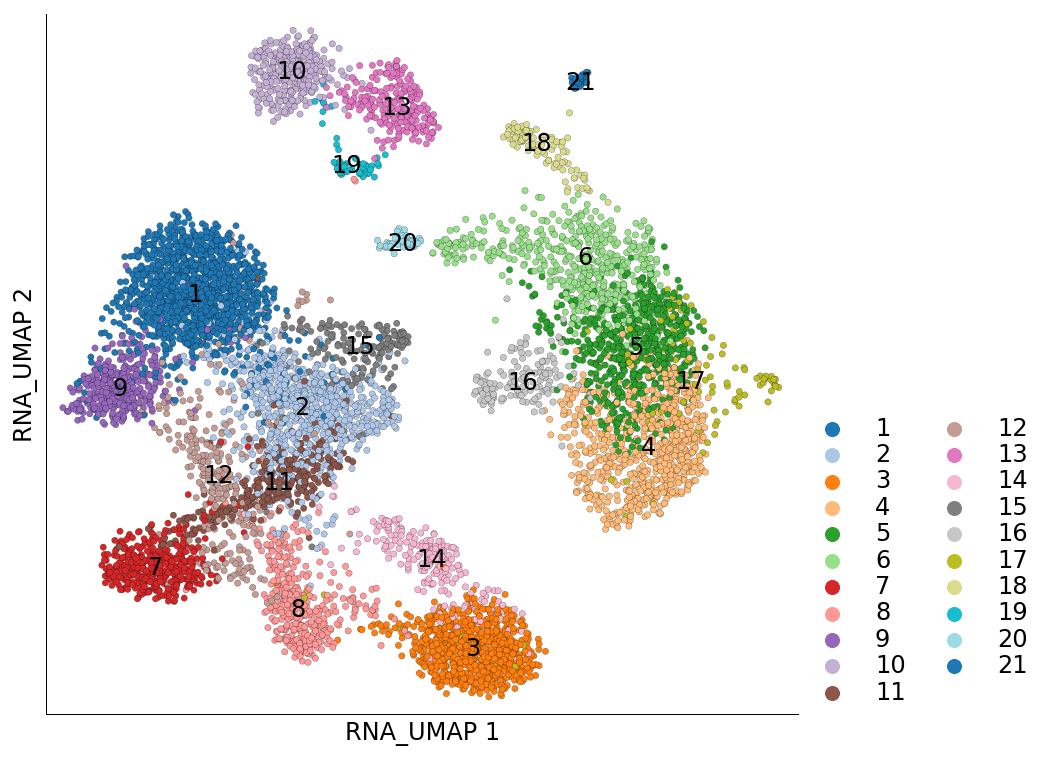

time: 1.32 s


In [4]:
ds = scarf.DataStore('scarf_data/tenx_10k_pbmc_citeseq/data.zarr')

ds.run_clustering(n_clusters=21)
ds.plot_layout(layout_key='RNA_UMAP', color_by='RNA_cluster')

UMAP, clustering and marker identification together allow a good understanding of cellular diversity. However, one can still choose from a plethora of other analysis on the data. For example, identification of cell differentiation trajectories. One of the major challenges to run these analysis could be the size of the data. Scarf performs a topology conserving downsampling of the data based on the cell neighbourhood graph. This downsampling aims to maximize the heterogeneity while sampling the cells from the the data.

Here we TopACeDo downsampling algorithm that leverages Scarf's KNN graph to perform a manifold preserving subsampling of cells. The subsampler can be invoked directly from Scarf's DataStore object.

In [5]:
ds.run_topacedo_sampler(cluster_key='RNA_cluster', max_sampling_rate=0.1)

Constructing graph from dendrogram: 100%|██████████| 7548/7548 [00:00<00:00, 39859.95it/s]


INFO: 769 cells (10.19%) sub-sampled. Subsample to Seed (347 cells) ratio: 2.216
INFO: Sketched cells saved under column 'RNA_sketched'
INFO: Cell neighbourhood densities saved under column: 'RNA_cell_density'
INFO: Mean SNN values saved under column: 'RNA_snn_value'
INFO: Seed cells saved under column: 'RNA_sketch_seeds'
time: 1.96 s


As a result of subsampling the sub sampled cells are marked True under the cell metadata column `RNA_sketched`. We can visualize these cells using `plot_layout`

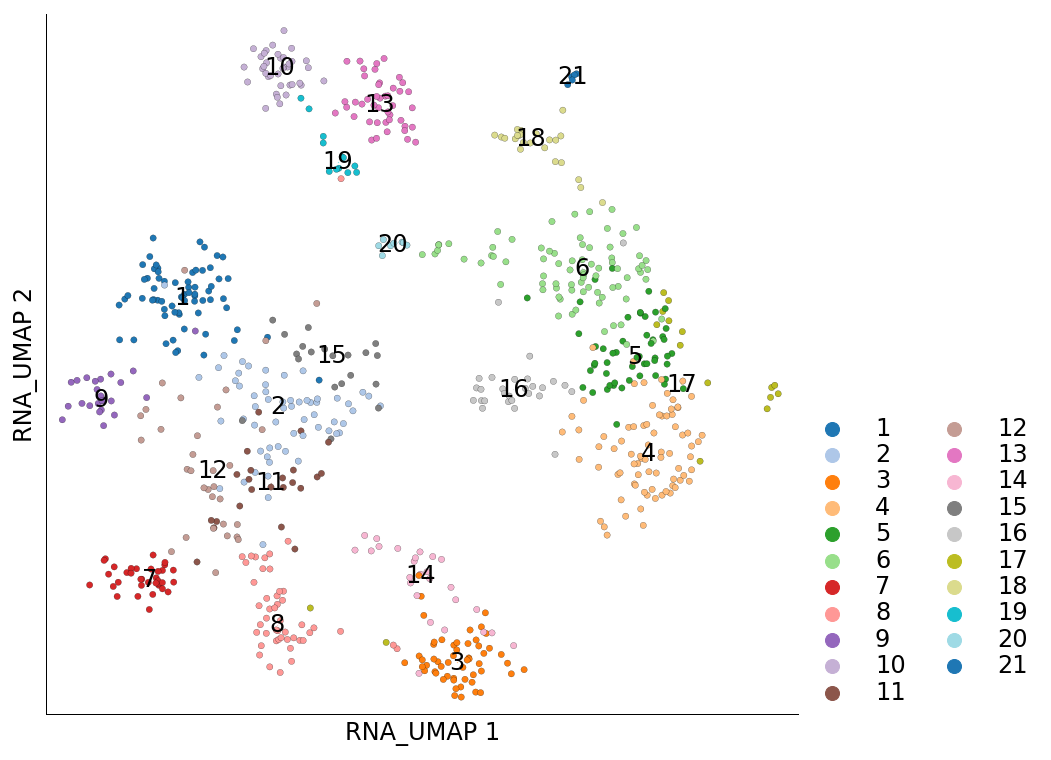

time: 555 ms


In [6]:
ds.plot_layout(layout_key='RNA_UMAP', color_by='RNA_cluster', subselection_key='RNA_sketched')

It may also be interesting to visualize the cells that were marked as `seed cells` useing using PCST was run. These cells are marked under the column `RNA_sketch_seeds`

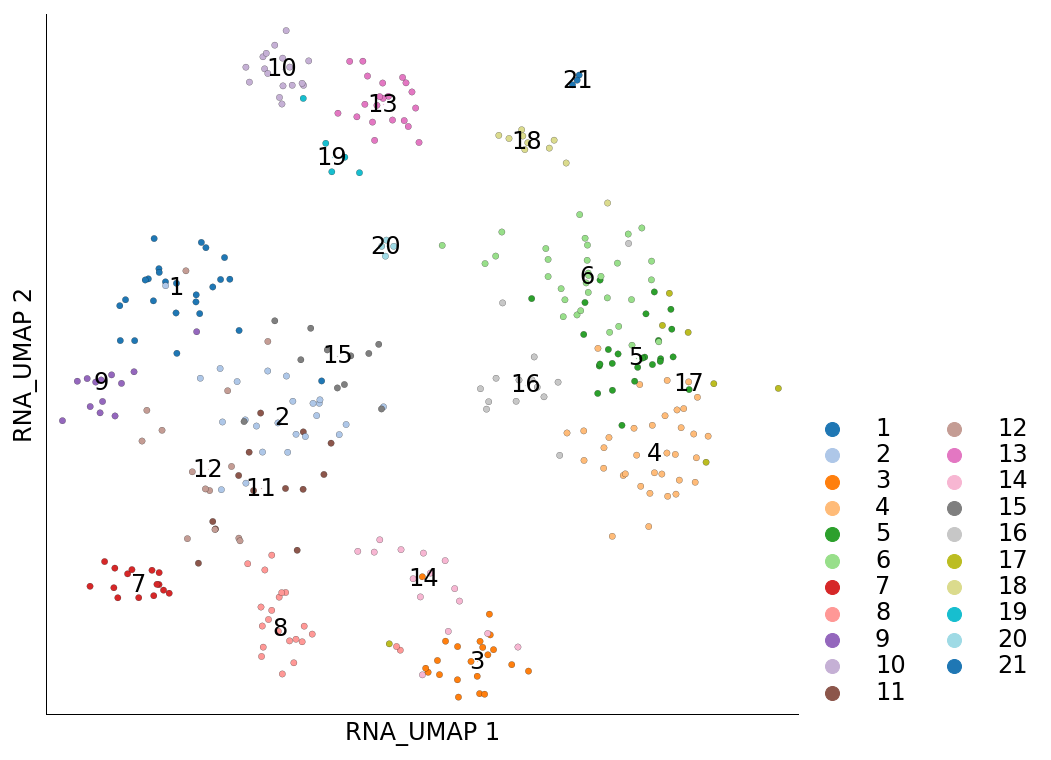

time: 554 ms


In [7]:
ds.plot_layout(layout_key='RNA_UMAP', color_by='RNA_cluster', subselection_key='RNA_sketch_seeds')

To identify the seed cells, the subsampling algorithm calculates cell densities based on neighbourhood degrees. Regions of higher cell density get a sampling penalty. The neighbourhood degree of individual cells are stored under the column `RNA_cell_density`

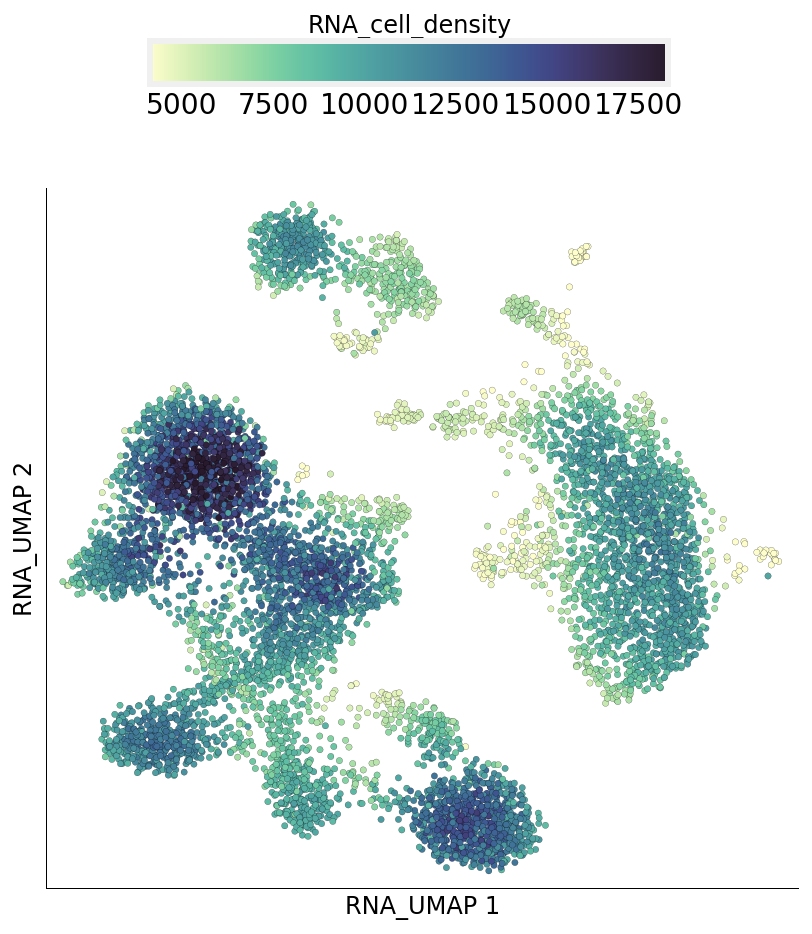

time: 748 ms


In [8]:
ds.plot_layout(layout_key='RNA_UMAP', color_by='RNA_cell_density')

The dowsampling algorithm also identififes regions of graph where cells form tightly connected groups by calculating mean shared nearest neighbours of each cell's nieghbours. The tightly connected regions get a sampling award. These values can be accessed from under the cell metadata column `RNA_snn_value`

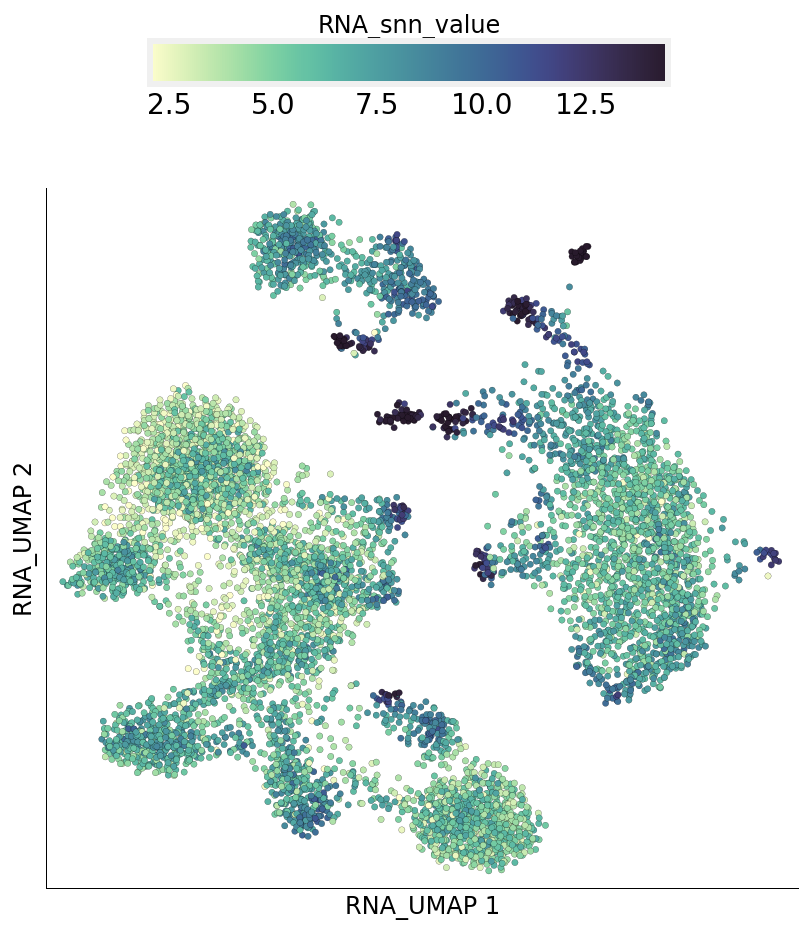

time: 696 ms


In [9]:
ds.plot_layout(layout_key='RNA_UMAP', color_by='RNA_snn_value')

---
That is all for this vignette.